# Kriging Example 2¶

- Author: Mohit S. Chauhan 
- Date: Aug 20, 2018

In this example, Kriging is used to generate a surrogate model for a given data. In this data, sample points are generated using STS class and functional value at sample points are estimated using a model defined in python script ('python_model_function.py).

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS, RunModel and Krig class from UQpy.

In [1]:
from UQpy.surrogates import Kriging
from UQpy.surrogates.kriging.regression_models import Constant
from UQpy.surrogates.kriging.correlation_models import Exponential
from UQpy.utilities import RectangularStrata
from UQpy.sampling import StratifiedSampling
from UQpy.RunModel import RunModel
from UQpy.distributions import Uniform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.List[typing.Callable] deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecate

Create a distribution object. 

In [2]:
marginals = [Uniform(loc=0., scale=1.), Uniform(loc=0., scale=1.)]

Create a strata object.

In [3]:
strata = RectangularStrata(strata_number=[10, 10])

Using UQpy STS class to generate samples for two random variables, which are uniformly distributed between 0 and 1.

In [4]:
x = StratifiedSampling(distributions=marginals, strata_object=strata, samples_per_stratum_number=1, random_state=1)

RunModel is used to evaluate function values at sample points. Model is defined as a function in python file 'python_model_function.py'.

In [5]:
rmodel = RunModel(model_script='python_model_function.py', vec=False)
rmodel.run(samples=x.samples)

Using UQpy Krig class to generate a surrogate for generated data. In this illustration, Quadratic regression model and Exponential correlation model are used.

In [6]:
regression_model = Constant()
correlation_model = Exponential()

from UQpy.optimization.MinimizeOptimizer import MinimizeOptimizer

optimizer= MinimizeOptimizer(method="L-BFGS-B")
K = Kriging(regression_model=regression_model, optimizer=optimizer,
            correlation_model=correlation_model,
            optimizations_number=20,
            correlation_model_parameters=[1, 1])
K.fit(samples=x.samples, values=rmodel.qoi_list)
print(K.correlation_model_parameters)

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/optimization/MinimizeOptimizer.py:24: OptimizeWarning: Unknown solver options: catol
  return minimize(function, initial_guess, args=args,


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33878D+02    |proj g|=  1.10463D+01

At iterate    1    f=  1.26646D+02    |proj g|=  7.26675D+00

At iterate    2    f=  1.25836D+02    |proj g|=  8.37663D-01

At iterate    3    f=  1.25443D+02    |proj g|=  8.00005D-01

At iterate    4    f=  1.24359D+02    |proj g|=  1.35262D+00

At iterate    5    f=  1.24280D+02    |proj g|=  6.76363D-01

At iterate    6    f=  1.24234D+02    |proj g|=  2.66131D-01

At iterate    7    f=  1.24230D+02    |proj g|=  6.27127D-02

At iterate    8    f=  1.24230D+02    |proj g|=  3.79832D-03

At iterate    9    f=  1.24230D+02    |proj g|=  7.51329D-05
True

[ 445893.65359366 4981290.66225588]
At iterate   10    f=  1.24230D+02    |proj g|=  1.28138D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = tot


At iterate    2    f=  1.35271D+02    |proj g|=  7.14128D-01

At iterate    3    f=  1.34584D+02    |proj g|=  4.15463D+00
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    4    f=  1.25885D+02    |proj g|=  3.93287D+00

At iterate    5    f=  1.24650D+02    |proj g|=  1.05682D+00

At iterate    6    f=  1.24283D+02    |proj g|=  6.40706D-01

At iterate    7    f=  1.24239D+02    |proj g|=  1.15612D-01

At iterate    8    f=  1.24230D+02    |proj g|=  4.15735D-02

At iterate    9    f=  1.24230D+02    |proj g|=  6.77216D-03

At iterate   10    f=  1.24230D+02    |proj g|=  4.43211D-05
True

At iterate   11    f=  1.24230D+02    |proj g|=  9.52745D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projecte

False
           * * *


[3.05025136e+04 1.00716545e+00]
Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     25      3     2     1   5.381D-05   1.415D+02
  F =   141.50634674022609     

ABNORMAL_TERMINATION_IN_LNSRCH                              
TrueRUNNING THE L-BFGS-B CODE

           * * *


[2.69199417e+06 1.01880750e+00]
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41894D+02    |proj g|=  2.67274D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   12    f=  1.24856D+02    |proj g|=  2.25453D+00

At iterate   13    f=  1.24450D+02    |proj g|=  2.57298D+00

At iterate   14    f=  1.24400D+02    |proj g|=  2.17976D+00

At iterate   15    f=  1.24270D+02    |proj g|=  8.40000D-01

At iterate   16    f=  1.24234D+02    |proj g|=  2.54278D-01

At iterate   17    f=  1.24230D+02    |proj g|=  4.52934D-02

At iterate   18    f=  1.24230D+02    |proj g|=  3.01157D-03

At iterate   19    f=  1.24230D+02    |proj g|=  2.67500D-05
True

At iterate   20    f=  1.24230D+02    |proj g|=  1.72942D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     

This plot shows the actual model which is used to evaluate the samples to identify the function values.

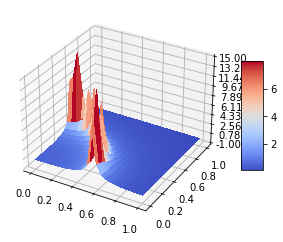

In [7]:
num = 25
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)

x1g, x2g = np.meshgrid(x1, x2)
x1gv, x2gv = x1g.reshape(x1g.size, 1), x2g.reshape(x2g.size, 1)

y2 = K.predict(np.concatenate([x1gv, x2gv], 1)).reshape(x1g.shape[0], x1g.shape[1])
r2model = RunModel(model_script='python_model_function.py')
r2model.run(samples=np.concatenate([x1gv, x2gv], 1))
y_act = np.array(r2model.qoi_list).reshape(x1g.shape[0], x1g.shape[1])

fig1 = plt.figure()
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(x1g, x2g, y_act, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-1, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

This plot shows the input data as red dot and green wirefram plot represent the kriging surrogate generated through Krig class.

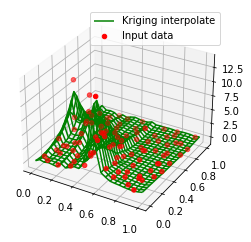

In [8]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
# Plot for estimated values
kr = ax2.plot_wireframe(x1g, x2g, y2, color='Green', label='Kriging interpolate')

# Plot for scattered data
ID = ax2.scatter3D(x.samples[:, 0], x.samples[:, 1], np.array(rmodel.qoi_list), color='Red', label='Input data')
plt.legend(handles=[kr, ID])
plt.show()